In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cmx
# For color mapping
import matplotlib.colors as colors

directorio="D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\"
version=1

In [11]:
def frequency(Lista):
    grupo={}
    for line in range(len(Lista)):
        try:
            b=grupo[Lista[line]]
            b+=1
            grupo.update({Lista[line]:b})
        except:
            grupo[Lista[line]]=1
    return(grupo)

In [2]:
# Cargamos una red previamente guardada en un archivo

N=3000000
i=0
G=nx.DiGraph()
archivo = open(directorio+'archivo_red_'+str(version)+'.txt','r',encoding='utf-8')
for line in archivo:
    i+=1
    G.add_edges_from([(line.split()[0],line.split()[1])])
    if i==N:
        break
archivo.close()
print(len(G),i)

117650 111957


In [3]:
# Separamos las componentes conectadas, al costo de volver a una red no dirigida

GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))

In [4]:
# Se abre el archivo de atributos que necesitamos

archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
N=1000000
fos = {}
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    for tag in range(len(a)):
            try:
                b=fos[a[tag]]
                b+=1
                fos.update({a[tag]:b})
            except:
                fos[a[tag]]=1
    if i==N:
        break
archivo.close()

In [5]:
# Cargamos los atributos a cada uno de los nodos

archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    freq=np.zeros(len(a))
    try:
        for k in range(len(a)):
            freq[k]=fos[a[k]]
        key=a[np.argmax(freq)]    
        G.node[line.split()[0]]['campo']=key
        j+=1
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

In [6]:
def graficar_componente(G,comp,atributo,ancho):
    #comp=comp-1
    GG=[]
    GG=G.to_undirected()
    Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
    prueba_red=[]
    prueba_red=Componente_INT[comp].copy()

    Componente=G.subgraph(Componentes[comp:comp+1][0])
    campos_list=[]

    Componente=G.subgraph(Componentes[comp:comp+1][0])
    val_map = {}
    campos_list=[]


    for paper in Componente:
        campos_list.append(Componente.node[paper][atributo])
        val_map.update({paper: Componente.node[paper][atributo]})
    
    grupo={}
    
    x={}
    sorted_by_value = []
    
    if atributo == 'year':
        y={}
        x=frequency(campos_list)
        
        for line in x.keys():
            y[line]=line
        sorted_by_value = sorted(y.items(), key=lambda kv: kv[1],reverse=True)
    else:   
        x=frequency(campos_list)
        sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)
    
    cmap =[]
    cmap = cmx.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))
    
    keys={}
    #keys=sorted_by_value
    conversion={}
    for i in range(len(sorted_by_value)):
        conversion.update({sorted_by_value[i][0]: cmap[i]})
   # print(conversion)

    color_map =[]  

    for paper in campos_list:
        color_map.append(conversion[paper])
    #print(campos_list)
    
    options = {
    'node_size': 85,
    'width': 3,
    }
    pos=nx.kamada_kawai_layout(Componente)
    
    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1)
    ax = f.add_subplot(1,1,1)
    for label in conversion:
        #pass
        ax.plot([ancho],[1],color=conversion[label],label=label,linestyle='',marker='.')
        ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
    # Just fixed the color map
    nx.draw_networkx(Componente,pos, node_color=color_map,with_labels=False,ax=ax, **options)

    # Setting it to how it was looking before.                                                                                                              
    plt.axis('off')
    f.set_facecolor('w')

    plt.legend(numpoints = 1)

    f.tight_layout()
    plt.show()

In [8]:
archivo = open(directorio+'archivo_venue_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    try:
        G.node[line.split()[0]]['venue']=' '.join(line.split()[1:len(line)-1])
        #print(' '.join(line.split()[1:len(line)-1]))
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

In [9]:
archivo = open(directorio+'archivo_year_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    if line.split()[0]=="ff1c14bf-1682-4703-b7bd-625810c45808":
        print(int(line.split()[1]))
    try:
        G.node[line.split()[0]]['year']=int(line.split()[1])
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

1982


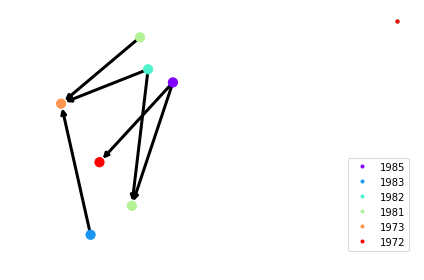

In [27]:
graficar_componente(G,800,'year',4)